In [65]:
from ema_workbench.analysis import prim
import pysubgroup as ps
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('/Users/inagege/Documents/00_Uni/Bachelorarbeit/ImprovingSubgroupDiscovery/Analyzing_Different_Subgroup_Discorvery_Algorithms/Data/Bryant et al 2010.csv')

In [66]:
def visualize_precision_and_recall(precision, recall):

    # Create a scatter plot
    plt.figure(figsize=(8, 6))
    plt.scatter(precision, recall, c='blue', marker='o')

    plt.xlim(0, 1.1)
    plt.ylim(0, 1.1)

    # Add labels and a legend
    plt.xlabel('Precision')
    plt.ylabel('Recall')
    plt.title('Precision vs. Recall')
    plt.legend()

    # Display the plot
    plt.grid(True)
    return plt

In [67]:
def data_preprocessing_ps(data, package):
    if package == 'pysubgroup':
        y = ps.BinaryTarget('Greater than 90%', True)
        x = ps.create_selectors(data, ignore={'Less than 10%', 'Greater than 90%'})
    else:
        if package == 'ema_workbench':
            y = data['Greater than 90%']
            temp_data = pd.DataFrame(data.drop(columns=['Less than 10%', 'Greater than 90%']))
            x = temp_data.values
    return x, y

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


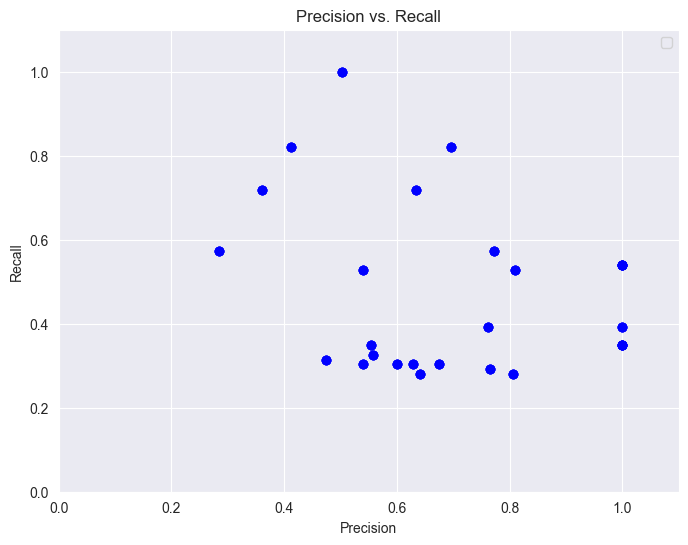

In [68]:
#result_set_size is number of sg which should be created
#if a new subgroup is created and we already have result_set_size subgroups its added if the quality is higher than the one of the lowest quality added yet
#TODO: whats about parameter depth
x, y = data_preprocessing_ps(data, 'pysubgroup')
task = ps.SubgroupDiscoveryTask(data, y, x, result_set_size=100, depth=400, qf=ps.WRAccQF())
result = ps.DFS().execute(task).to_dataframe()
#Recall in this statistics is meant by coverage_sg
#Target_share_sg means Precision

visualize_precision_and_recall(result['target_share_sg'], result['coverage_sg']).show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


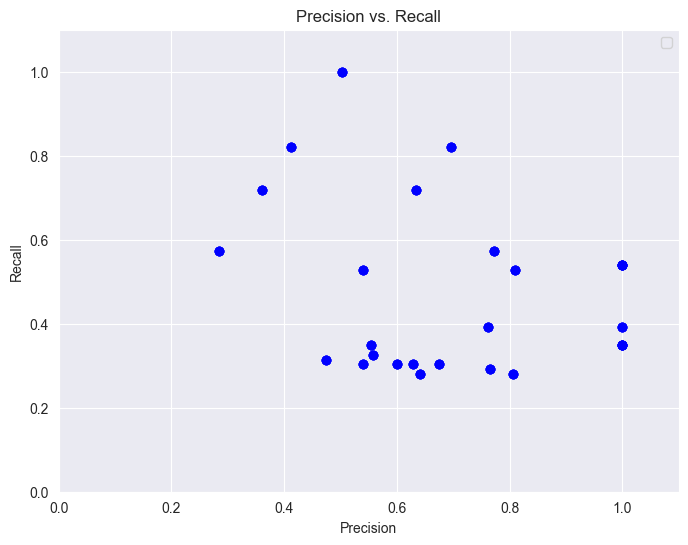

In [69]:
result = ps.BeamSearch(beam_width=300).execute(task).to_dataframe()
visualize_precision_and_recall(result['target_share_sg'], result['coverage_sg']).show()

/Users/inagege/Documents/00_Uni/Bachelorarbeit/ImprovingSubgroupDiscovery/venv/lib/python3.9/site-packages/pysubgroup/binary_target.py:356: RuntimeWarning: invalid value encountered in divide
  p_subgroup = np.divide(positives_subgroup, instances_subgroup)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


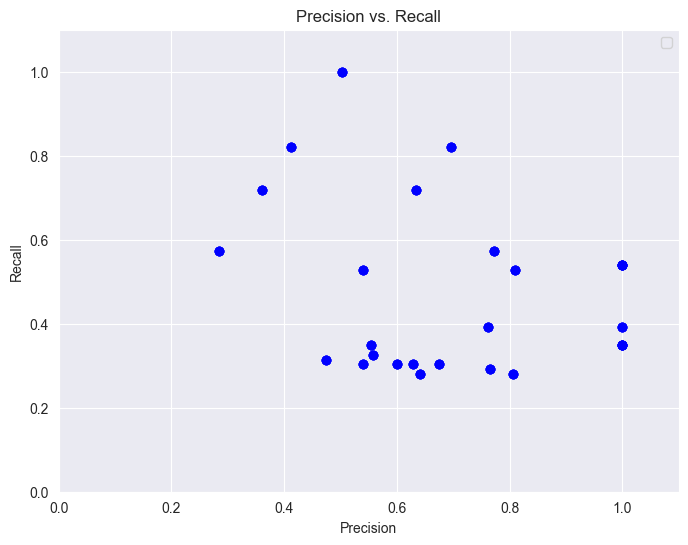

In [70]:
result = ps.Apriori().execute(task).to_dataframe()
visualize_precision_and_recall(result['target_share_sg'], result['coverage_sg']).show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<module 'matplotlib.pyplot' from '/Users/inagege/Documents/00_Uni/Bachelorarbeit/ImprovingSubgroupDiscovery/venv/lib/python3.9/site-packages/matplotlib/pyplot.py'>

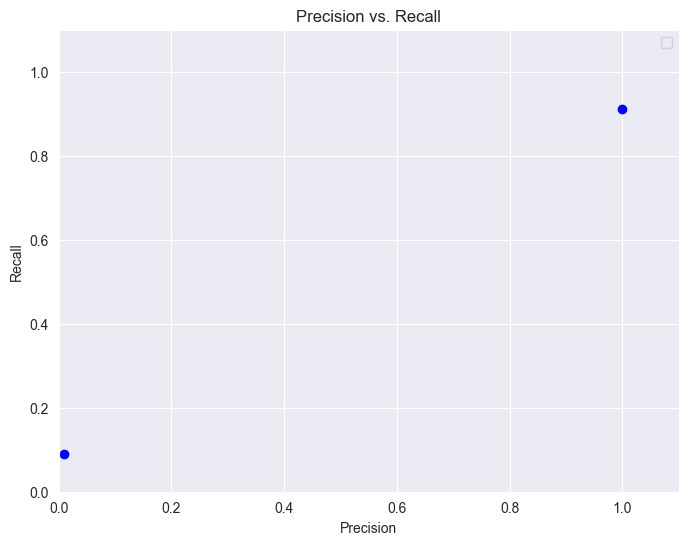

In [72]:
prec = []
rec = []

x, y = data_preprocessing_ps(data, 'ema_workbench')
prim_alg = prim.Prim(x, y, threshold=0.8, peel_alpha=0.1)
box = prim_alg.find_box()

while box is not None:
    prec.append(box.density)
    rec.append(box.coverage)
    box = prim_alg.find_box()
    
visualize_precision_and_recall(prec, rec)

In [9]:
print(y)

T: Greater than 90%==True
